## Imports
Execute the cell below to import all packages needed.

In [1]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
import matplotlib.image as mpimg
from skimage import data, io, filters
from numpy import linspace
from numpy.core.umath import pi
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from emojipedia import Emojipedia
from skimage import io

## Load csv into pandas dataframe

In [2]:
path__tweets_csv = '/home/stelios/Desktop/Honours Project/Samples/tweet_data/tweets_ran_all.csv'
path_users_csv = '/home/stelios/Desktop/Honours Project/Samples/user_data/ran.csv'

#ran_tweets_df = pd.read_csv(path__tweets_csv,index_col=None, header=0, low_memory = False).applymap(str)
#ran_users_df = pd.read_csv(path_users_csv,index_col=None, header=0, low_memory = False).applymap(str)

ran_join_df = pd.read_csv(path__tweets_csv,index_col=None, header=0, low_memory = False).applymap(str).join(pd.read_csv(path_users_csv,index_col=None, header=0, low_memory = False).applymap(str).set_index('user_id'), on='user_id')

## Extract, Count & Sort Emojis for all

In [3]:
extract = Extractor()

count = extract.count_all_emoji(ran_join_df['text'])

# Display most common
#count.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count:
    emojis_count_df = emojis_count_df.append({'Emoji' : emoji , 'Count' : count[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_df = emojis_count_df.sort_values(by=['Count'])
emojis_count_df.tail(20)

,Emoji,Count
99,💗,33495
135,🙄,36686
21,💙,38404
28,🙏,38783
151,♥,38865
2,👍,39711
36,😘,42422
26,👏,46411
50,🔥,50812
9,🤔,51281


## Top 15 Emojis Graph

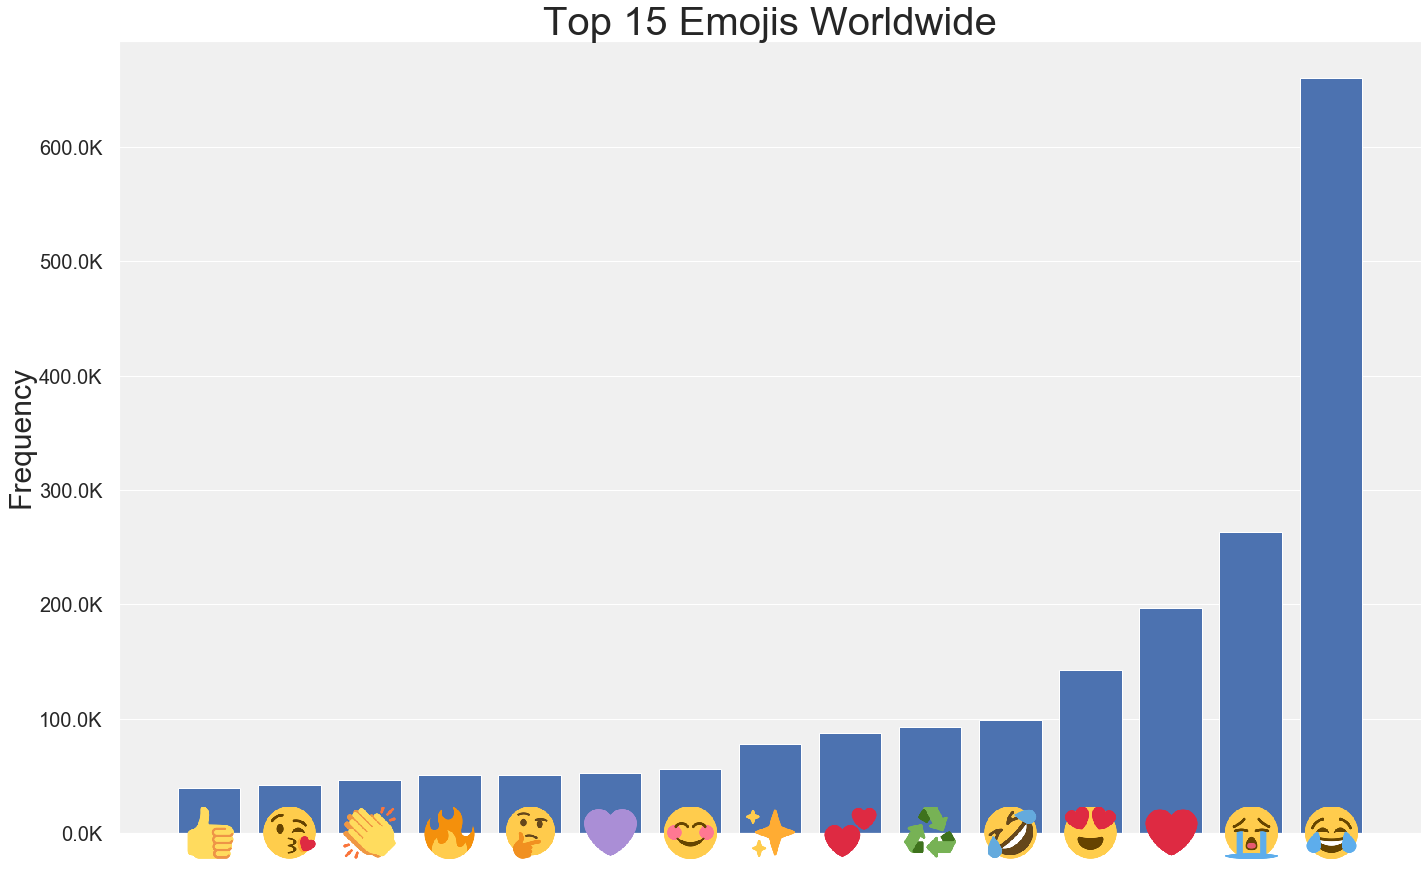

In [4]:
# Top 15 Values
x = emojis_count_df['Emoji'].tail(15).values
y = emojis_count_df['Count'].tail(15).values

# Millions Formatter Function
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x*1e-3)

# Create a formatter
formatter_millions = FuncFormatter(millions)

# Use TwitterColorEmoji Font (only one supporting emojis) 
emojis_font = FontProperties(fname='./Fonts/TwitterColorEmoji-SVGinOT.ttf',size=55)

# Set linespacing
x_linespace = linspace(0, 4*pi, num=15)

# Plot Bar Chart
sns.set(color_codes=True) # Seaborn 
fig, ax = plt.subplots(figsize=(20,12))
ax.yaxis.set_major_formatter(formatter_millions)
ax.tick_params(axis='both', which='major', pad=10)
ax.set_facecolor('#0F0F0F0F')
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x_linespace, y, width=0.7, bottom=None, align='center')
ax.get_xaxis().set_visible(False)
#plt.xticks(x, fontproperties=emojis_font)  Old method
plt.yticks(fontsize =20)
plt.ylabel('Frequency', fontsize =30)
plt.title('Top 15 Emojis Worldwide', fontsize =40)
plt.tight_layout()

# Set sizes of figure and images
ax_width = ax.get_window_extent().width
fig_width = fig.get_window_extent().width
fig_height = fig.get_window_extent().height
img_size = ax_width/(fig_width*len(x_linespace))
img_axs = [None for i in range(len(x_linespace))]


# Display emojis pngs on x-axis
for i in range(len(x)):
    loc = ax.transData.transform((x_linespace[i], 0))      # Optimize y manually 
    img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                               img_size, img_size], anchor='C')
    
    # Platform 5 = Twitter
    img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
    img_axs[i].axis("off")

plt.show()

## Extract, Count & Sort Emojis for females

In [5]:
# Count emojis (Gender Confidence =1)
count_females = extract.count_all_emoji(ran_join_df.loc[(ran_join_df['gender'] == 'female')& (ran_join_df['gender:confidence'].astype(float)==1)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_females_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_females:
    emojis_count_females_df = emojis_count_females_df.append({'Emoji' : emoji , 'Count' : count_females[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_females_df = emojis_count_females_df.sort_values(by=['Count'])
emojis_count_females_df.tail(20)

,Emoji,Count
117,🤔,4451
151,🙏,4526
1256,◀,4627
38,💛,4769
26,💖,4929
49,👏,5096
27,💗,5796
108,💔,5944
279,💙,6082
83,😘,6607


## Extract, Count & Sort Emojis for males

In [6]:
# Count emojis (Gender Confidence =1)
count_males = extract.count_all_emoji(ran_join_df.loc[(ran_join_df['gender'] == 'male')& (ran_join_df['gender:confidence'].astype(float)==1)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_males_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_males:
    emojis_count_males_df = emojis_count_males_df.append({'Emoji' : emoji , 'Count' : count_males[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_males_df = emojis_count_males_df.sort_values(by=['Count'])
emojis_count_males_df.tail(20)

,Emoji,Count
8,😢,2294
43,✨,2301
26,😩,2554
4,👍,2683
91,🙄,2758
1,💙,2798
127,😁,2961
39,🙏,3539
41,👏,3625
115,🤔,3681


## Top 15 Emojis Graph by Gender

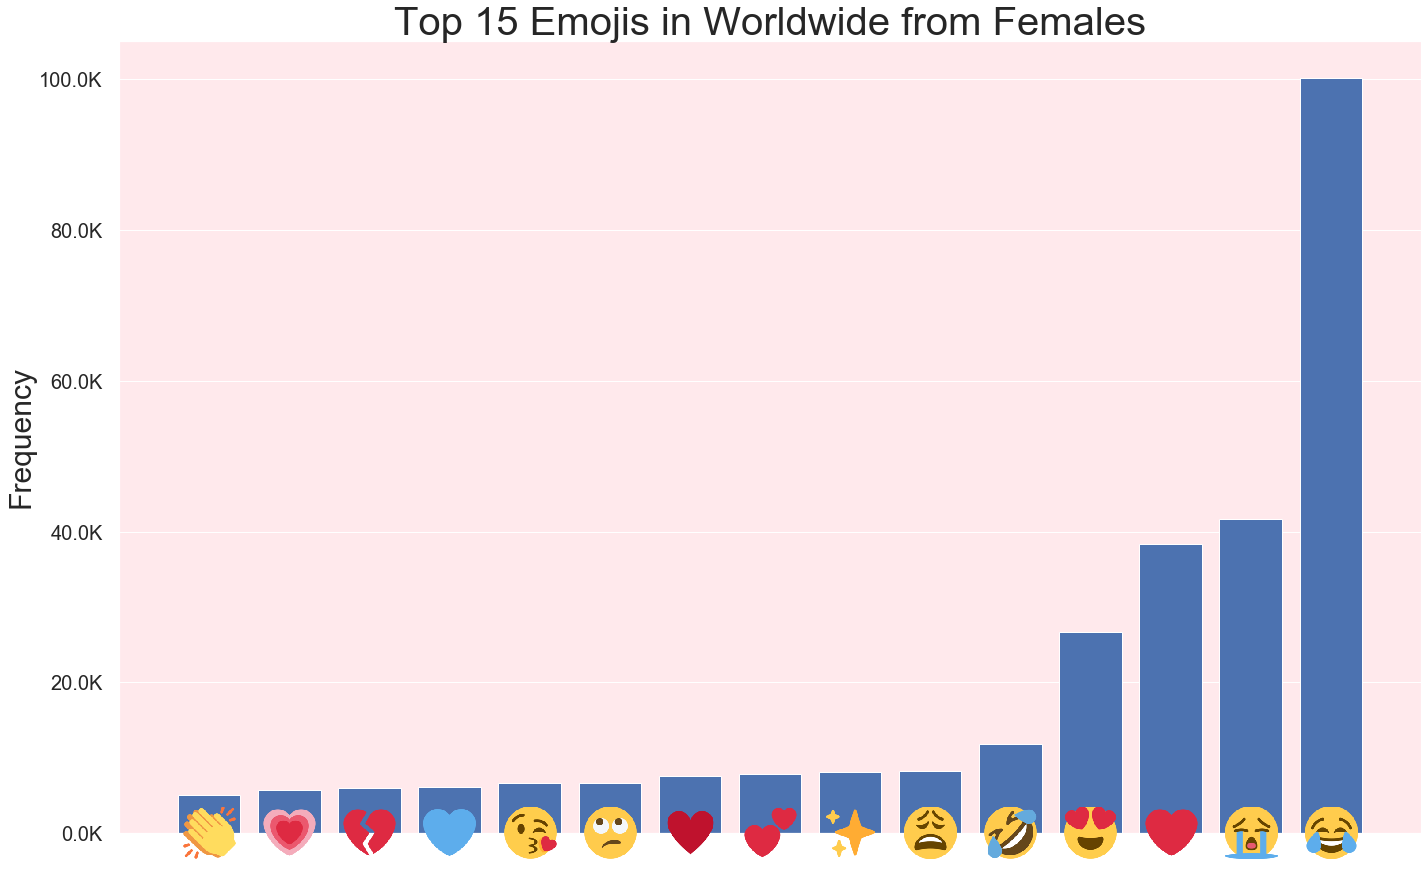

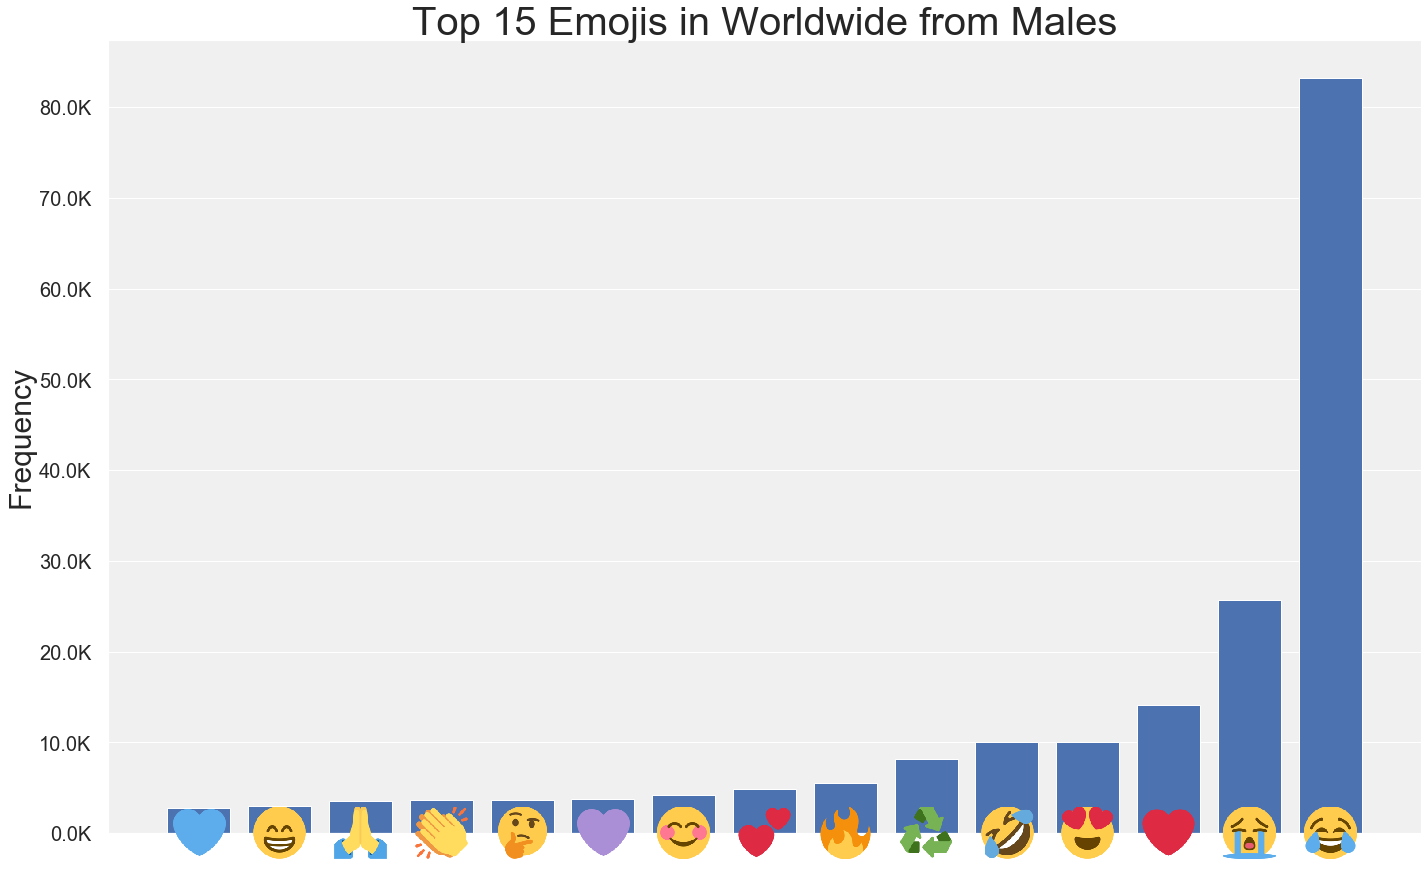

In [14]:
gender_list = ['Females','Males']
gender_values =[emojis_count_females_df,emojis_count_males_df]
gender_graph_colours=['ffe9ec','0F0F0F0F']

for ind,gen in enumerate(gender_list):
    
    # Top 15 Values
    x = gender_values[ind]['Emoji'].tail(15).values
    y = gender_values[ind]['Count'].tail(15).values

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_millions)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y, width=0.7, bottom=None, align='center')
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top 15 Emojis in Worldwide from {}'.format(gender_list[ind]), fontsize =40)
    plt.tight_layout()

    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]


    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], 0)) # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

    plt.show()

## Extract, Count & Sort Emojis for White Ethnicity

In [8]:
# Count emojis (Ethnicity Confidence: 0.8)
count_white = extract.count_all_emoji(ran_join_df.loc[(ran_join_df['ethnicity'] == 'white')& (ran_join_df['ethnicity:confidence'].astype(float)>0.8)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_white_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_white:
    emojis_count_white_df = emojis_count_white_df.append({'Emoji' : emoji , 'Count' : count_white[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_white_df = emojis_count_white_df.sort_values(by=['Count'])
emojis_count_white_df.tail(20)

,Emoji,Count
2,😊,2488
366,🔴,2568
89,🔥,2589
132,🤔,2655
85,🙄,2749
38,👏,2786
1045,♻,2862
73,💖,2969
477,🔵,3151
220,🙏,3313


## Extract, Count & Sort Emojis for Black Ethnicity

In [9]:
# Count emojis (Ethnicity Confidence: 0.8)
count_black = extract.count_all_emoji(ran_join_df.loc[(ran_join_df['ethnicity'] == 'black')& (ran_join_df['ethnicity:confidence'].astype(float)>0.8)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_black_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_black:
    emojis_count_black_df = emojis_count_black_df.append({'Emoji' : emoji , 'Count' : count_black[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_black_df = emojis_count_black_df.sort_values(by=['Count'])
emojis_count_black_df.tail(20)

,Emoji,Count
33,🤦🏾‍♀️,870
65,😢,937
24,🤧,965
79,😊,1014
17,🗣,1025
66,😒,1154
4,😘,1167
26,💯,1280
32,🤔,1420
87,💗,1463


## Extract, Count & Sort Emojis for Hispanic Ethnicity

In [10]:
# Count emojis (Ethnicity Confidence: 0.75)
count_hispanic = extract.count_all_emoji(ran_join_df.loc[(ran_join_df['ethnicity'] == 'hispanic')& (ran_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_hispanic_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_hispanic:
    emojis_count_hispanic_df = emojis_count_hispanic_df.append({'Emoji' : emoji , 'Count' : count_hispanic[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_hispanic_df = emojis_count_hispanic_df.sort_values(by=['Count'])
emojis_count_hispanic_df.tail(20)

,Emoji,Count
25,♥,279
6,😩,290
133,💖,302
128,😒,320
301,🤧,322
115,🤤,325
5,🤔,331
2,😢,332
169,🎶,332
134,💗,338


## Extract, Count & Sort Emojis for Asian Ethnicity

In [11]:
# Count emojis (Ethnicity Confidence: 0.75)
count_asian = extract.count_all_emoji(ran_join_df.loc[(ran_join_df['ethnicity'] == 'asian')& (ran_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_asian_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_asian:
    emojis_count_asian_df = emojis_count_asian_df.append({'Emoji' : emoji , 'Count' : count_asian[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_asian_df = emojis_count_asian_df.sort_values(by=['Count'])
emojis_count_asian_df.tail(20)

,Emoji,Count
33,♥,1883
280,💚,2001
272,❗,2074
161,💖,2098
157,💦,2178
74,😁,2430
16,💓,2715
42,☺,3044
1,😊,3159
200,🤣,3512


## Top 15 Emojis Graph by Ethnicity

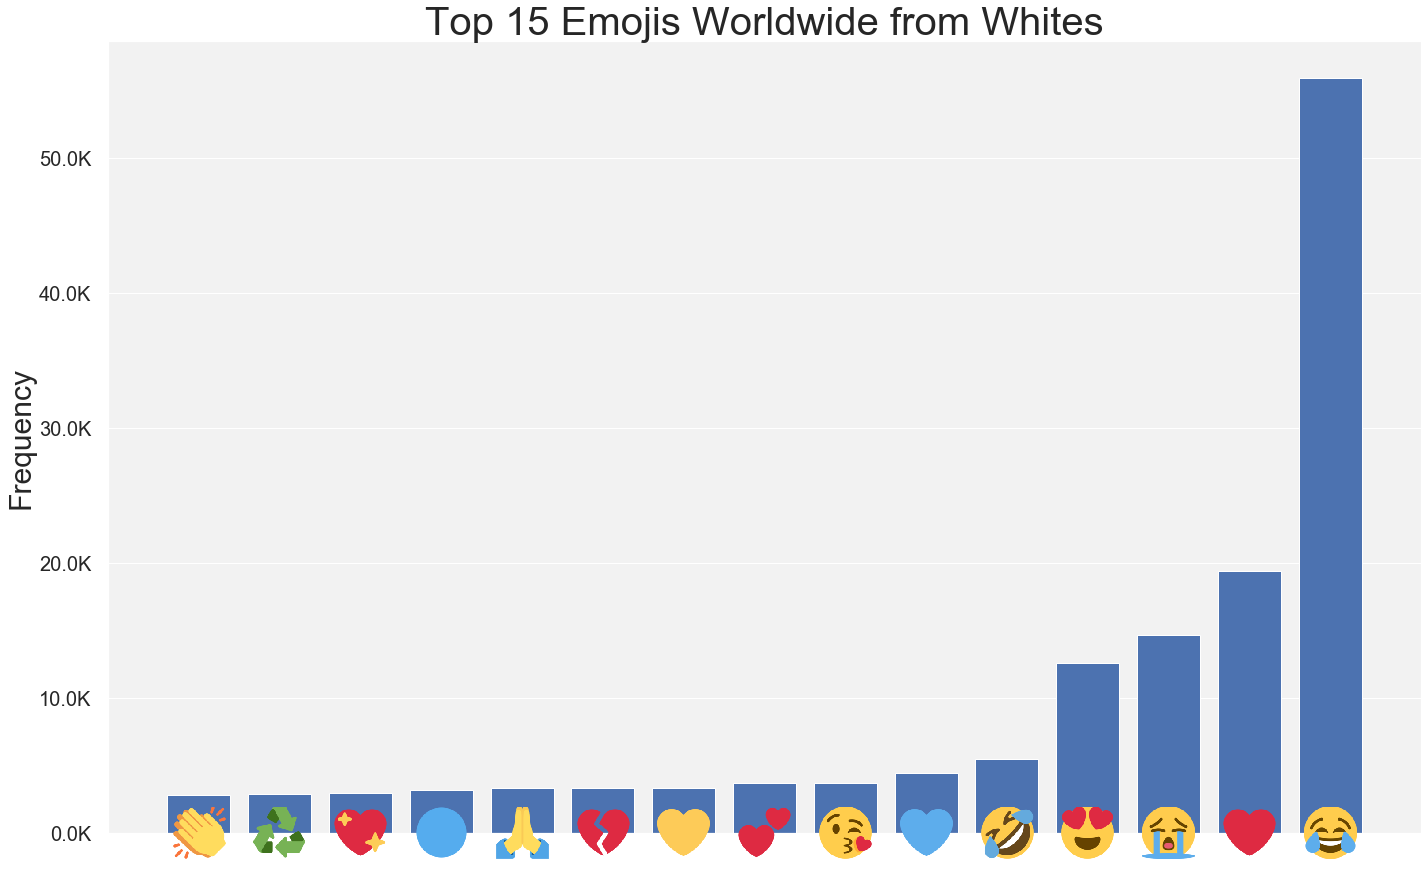

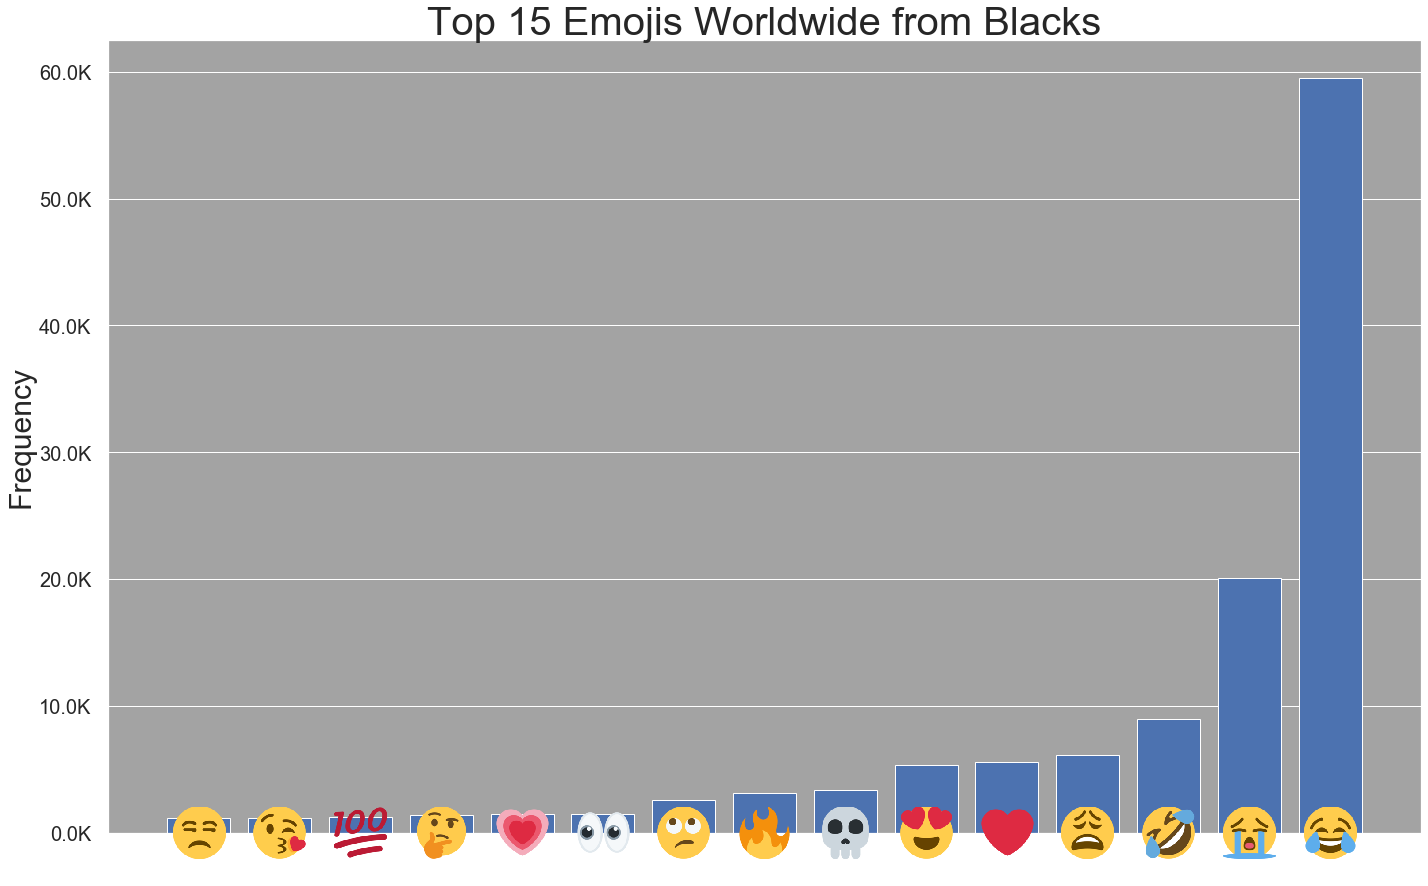

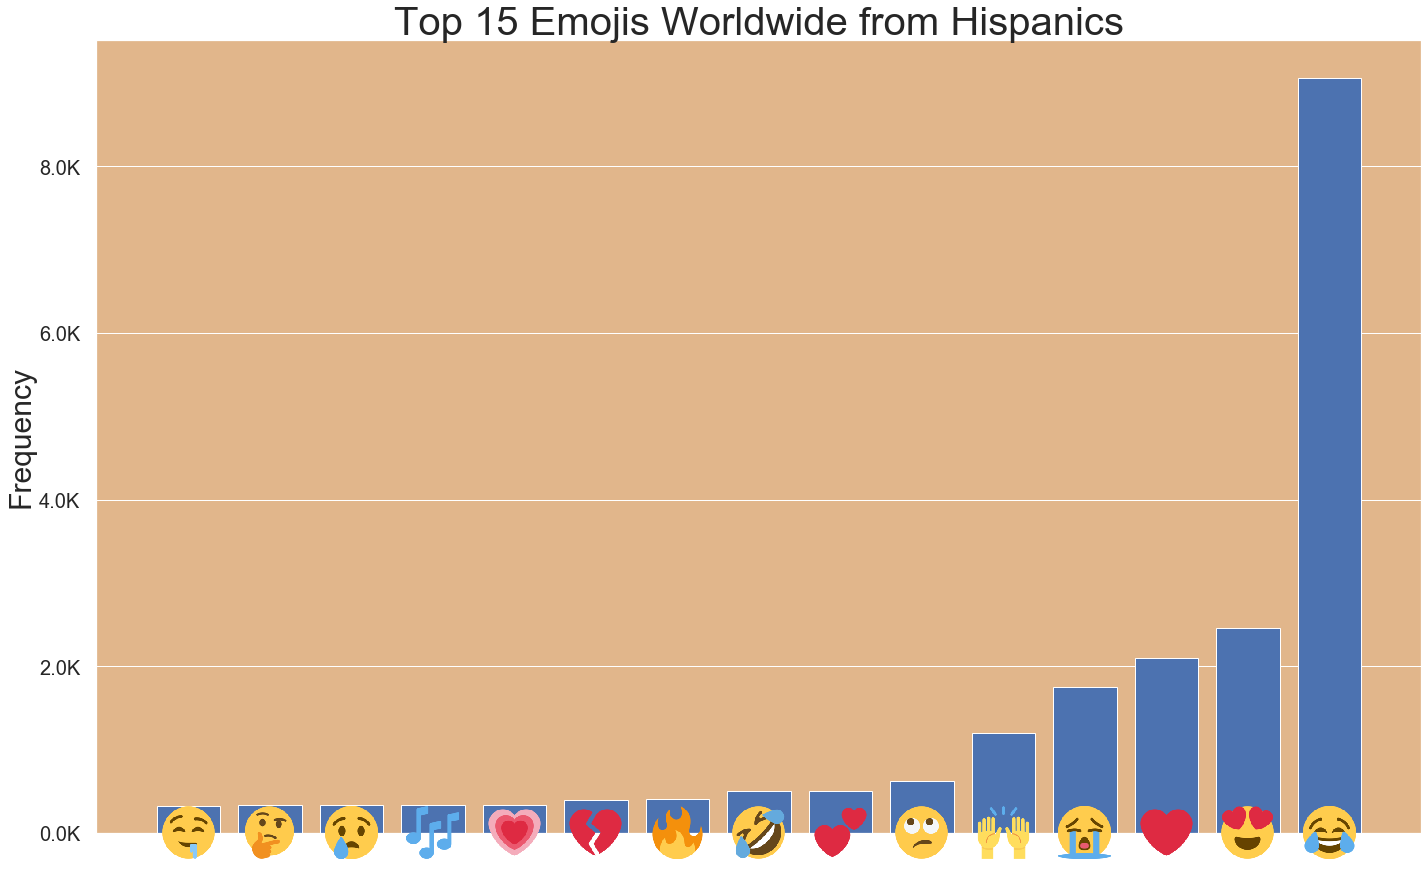

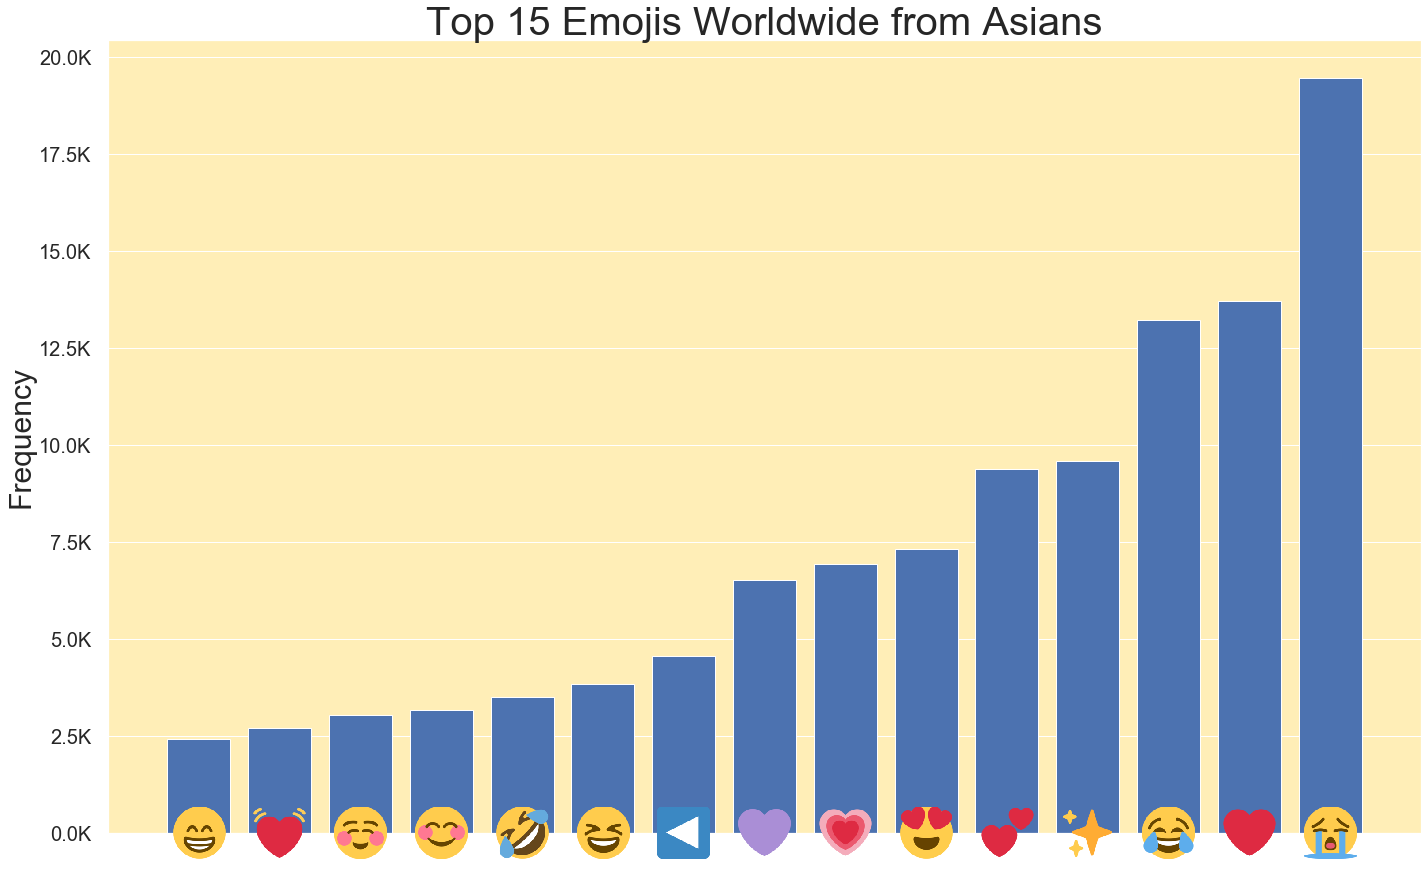

In [13]:
ethnicities_list = ['Whites','Blacks','Hispanics','Asians']
ethnicities_values =[emojis_count_white_df,emojis_count_black_df,emojis_count_hispanic_df,emojis_count_asian_df]
ethnicities_graph_colours=['f2f2f2','a3a3a3','e1b68b','ffeeb7']

for ind,ethn in enumerate(ethnicities_list):

     # Top 15 Values
    x = ethnicities_values[ind]['Emoji'].tail(15).values
    y = ethnicities_values[ind]['Count'].tail(15).values

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_millions)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(ethnicities_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y, width=0.7, bottom=None, align='center')
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top 15 Emojis Worldwide from {}'.format(ethnicities_list[ind]), fontsize =40)
    plt.tight_layout()

    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]


    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], 0)) # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

    plt.show()